# Exploratory Data Analysis

Explore data visually and quantitatively. EDA is a crucial component of any data science project. pandas has powerful methods that help with statistical and visual EDA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Line Plot

By default the pandas.plot() will create a Line Plot

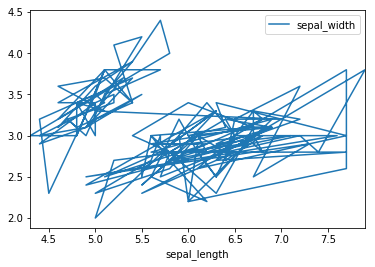

In [2]:
df.plot(x='sepal_length', y='sepal_width')
plt.show()

## Scatter Plot

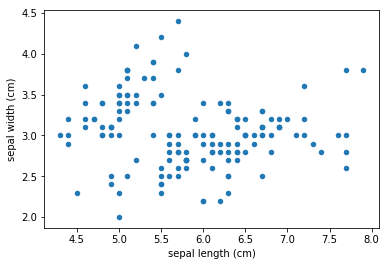

In [3]:
df.plot(x='sepal_length', y='sepal_width', kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Box Plot

Individual variable distributions are likely to be more informative than plotting two variables against each other.

**Boxplot shows the *Range (min & max values)* with the whiskers, the *Interquartile Range* with the box edges, and the *Median* inside**

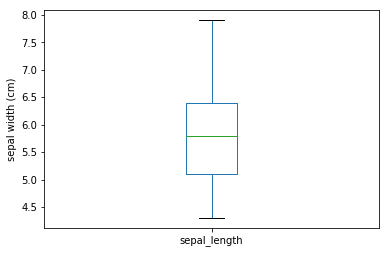

In [4]:
df.plot(y='sepal_length', kind='box')
plt.ylabel('sepal width (cm)')
plt.show()

## Histogram

Another popular plotting tool for EDA is a Histogram

**Histograms show *Frequencies of Measurements* counted within certain *bins* or *intervals***

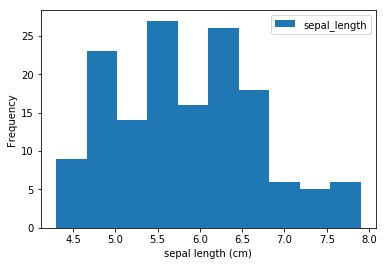

In [5]:
df.plot(y='sepal_length', kind='hist')
plt.xlabel('sepal length (cm)')
plt.show()

### Histogram Options

* bins (integer): Number of intervals or bins
* range (tuple): Extrema of bins (min, max)
* density (boolean): Whether to normalize to one
* cumulative (boolean): Compute Cumulative Distribution Function (CDF)
* Many matplotlib options can be specified using keyword arguments with plot

### Customizing Histogram

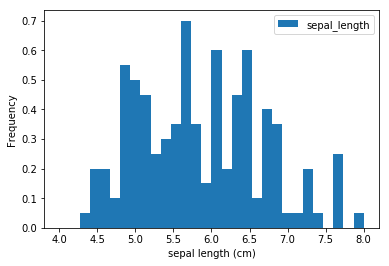

In [6]:
df.plot(y='sepal_length', kind='hist', bins=30, range=(4,8), density=True)
plt.xlabel('sepal length (cm)')
plt.show()

#### Cumulative Distribution

Cumulative Distribution adds up the areas of a rectangle under a normalized histogram

CDFs are used to compute the probability of observing a value in a given range (for instance, a sepal width between 2 and 4 cm)

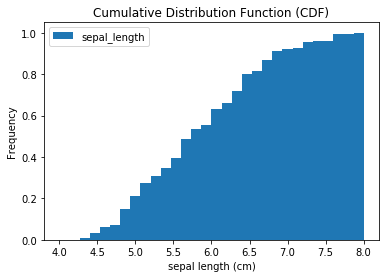

In [7]:
df.plot(y='sepal_length', kind='hist', bins=30, range=(4,8), density=True, cumulative=True)
plt.xlabel('sepal length (cm)')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

**Example**: CDF evaluated at, sepal length 5cm is the probability of observing a flower with sepal length up to 5 cm (in this case less than 20%). 

A CDF is often a smooth curve increasing from zero to one

## Word of Warning

* There are currently 3 different DataFrame plotting idioms in pandas
    * df.plot(kind='hist')
    * df.plt.hist()
    * df.hist()
* Syntax/Results differ

# Statistical Exploratory Data Analysis

Plots are useful, but is is useful to have quantitative results as well.

## Summarizing with describe()
* count: Number of entries
    * Returns number of non-null entries in a given numerical column
* mean: Average of entries
    * Returns average of a series and the average of DataFrames column-wise, ignoring null entries
* std: Standard Deviation
    * Std measures the spread of values.
    * IE) On a bell-curve distribution, the mean is roughly in the middle, where as the std is the width of the bell curve
* min: Minimum Entry
* 25%: First quartile
* 50%: Median or 2nd quartile
* 75%: Third quartile
* max: Maximum entry

Note: All Series & DataFrame statistical methods ignore null entries. This is to make sure that certain summary statistics are not diluted by null entries.

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Counts

In [9]:
# Applied to Series
df['sepal_length'].count()

150

In [10]:
# Applied to DataFrame
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

### Mean (Averages)

In [11]:
# Applied to Series
df['sepal_length'].mean()

5.843333333333335

In [12]:
# Applied to DataFrame
df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

### Standard Deviations

In [13]:
df.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

### Medians

A median is a special example of a quantile. If **q** is a number between 0 and 1, and the **qth** quantile of a dataset is a numerical value that splits the data into two sets, one with the fraction **q** of smaller observations, the other with larger observations.

Colloquially, quantiles are called percentiles. Using percentages between 0 & 100 rather than fractions between 0 and 1.

In [14]:
df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

#### Medians & 0.5 quantiles

In [15]:
q = 0.5
df.quantile(q)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

#### Inter-quartile range (IQR)

The quantile() function that also take a list of numbers to return the IQR.

The DataSet below is saying that 50% of our data has a petal_length between 1.6 cm and 5.1 cm

In [16]:
q = [0.25, 0.75]
df.quantile(q)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


### Ranges

In [17]:
df.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [18]:
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

### Using Box Plots for Summarizing Data

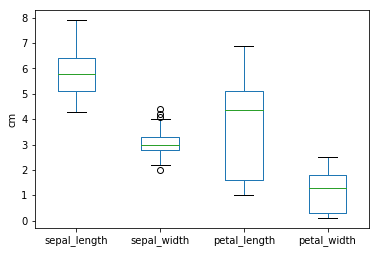

In [19]:
df.plot(kind='box')
plt.ylabel('cm')
plt.show()

# Separating Populations

## Describe Column

* count: # non-null entries
* unique: # of distinct values
* top: most frequent category
* freq: # of occurrences of top

In [20]:
df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

### Unique & Factors

Knowing that there are 3 different factors, it makes sense to carry out EDA separately on each factor.

In [21]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Filtering by Species

In [22]:
# Define a Series called indices in which the species is setosa
indices = df['species'] == 'setosa'
indices.head()

0    True
1    True
2    True
3    True
4    True
Name: species, dtype: bool

In [23]:
setosa = df.loc[indices, :]
setosa['species'].unique()

array(['setosa'], dtype=object)

In [24]:
# Another way to filter and separate data
setosa2 = df[df['species'] == 'setosa']
setosa2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# Since we have only 'setosa' species within the setosa DataFrame, we can delete the now redundant species column
del setosa['species']

# Visual EDA: All Data

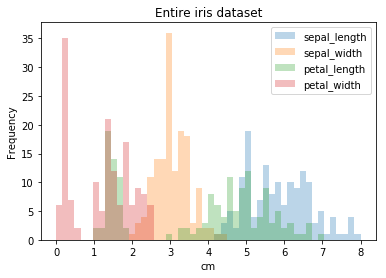

In [26]:
df.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Entire iris dataset')
plt.xlabel('cm')
plt.show()

## Visual EDA: Individual Factors

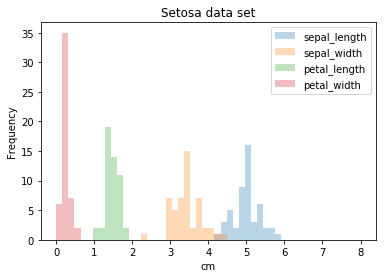

In [27]:
setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('cm')
plt.show()